In [1]:
# Importing the libraries

using CairoMakie
using NetCDF
using YAXArrays

In [2]:
# Filename for data

filename_small = "../results/data/formated_small.nc"
filename_large = "../results/data/formated_large.nc"

"../results/data/formated_large.nc"

In [3]:
# Importing the data

ds = (
    small = open_dataset(filename_small),
    large = open_dataset(filename_large)
)

(small = YAXArray Dataset
Shared Axes: 
()
Variables: 
energy
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
T_z
  (↓ xC Sampled{Float64} 0.5:1.0:127.5 ForwardOrdered Regular Points,
  → yC Sampled{Float64} 0.5:1.0:127.5 ForwardOrdered Regular Points)
w_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
u_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
v_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
T_w_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
w_P_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
v_w_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
u_P_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
P_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
T_bar
  (↓ zC Sampled{Float64} -127.5:1.0:-0.5 ForwardOrdered Regular Points)
T_y
  (↓ xC S

In [4]:
# Reading the data

u_bar = (small = Array(ds.small.u_bar), large = Array(ds.large.u_bar))
v_bar = (small = Array(ds.small.v_bar), large = Array(ds.large.v_bar))
w_bar = (small = Array(ds.small.w_bar), large = Array(ds.large.w_bar))
T_bar = (small = Array(ds.small.T_bar), large = Array(ds.large.T_bar))
P_bar = (small = Array(ds.small.P_bar), large = Array(ds.large.P_bar))

T_w_bar = (small = Array(ds.small.T_w_bar), large = Array(ds.large.T_w_bar))
u_w_bar = (small = Array(ds.small.u_w_bar), large = Array(ds.large.u_w_bar))
v_w_bar = (small = Array(ds.small.v_w_bar), large = Array(ds.large.v_w_bar))

u_P_bar = (small = Array(ds.small.u_P_bar), large = Array(ds.large.u_P_bar))
v_P_bar = (small = Array(ds.small.v_P_bar), large = Array(ds.large.v_P_bar))
w_P_bar = (small = Array(ds.small.w_P_bar), large = Array(ds.large.w_P_bar))

energy = (small = Array(ds.small.energy), large = Array(ds.large.energy))

T_small = (x = Array(ds.small.T_x), y = Array(ds.small.T_y), z = Array(ds.small.T_z))
T_large = (x = Array(ds.large.T_x), y = Array(ds.large.T_y), z = Array(ds.large.T_z))

# So there is no very large output
1

1

In [5]:
# General function to plot automatically the different profiles

function plot_data(data, title)
    fig = Figure(size = (800, 800))
    

    dims = (
        small = size(data.small)[1], 
        large = size(data.large)[1]
    )
    
    ax_s = Axis(
        fig[1, 1]; 
        title = L"%$(title) at t = 1200 mins (128x128x128 points resolution)", 
        ylabel = title, 
        xlabel = "z (meters)"
    )
    lines!(ax_s, LinRange(-128, 0, dims.small), data.small)

    ax_l = Axis(
        fig[2, 1]; 
        title = L"%$(title) at t = 1200 mins (256x256x256 points resolution)", 
        ylabel = title, 
        xlabel = "z (meters)"
    )
    lines!(ax_l, LinRange(-128, 0, dims.large), data.large)

    return fig


end

plot_data (generic function with 1 method)

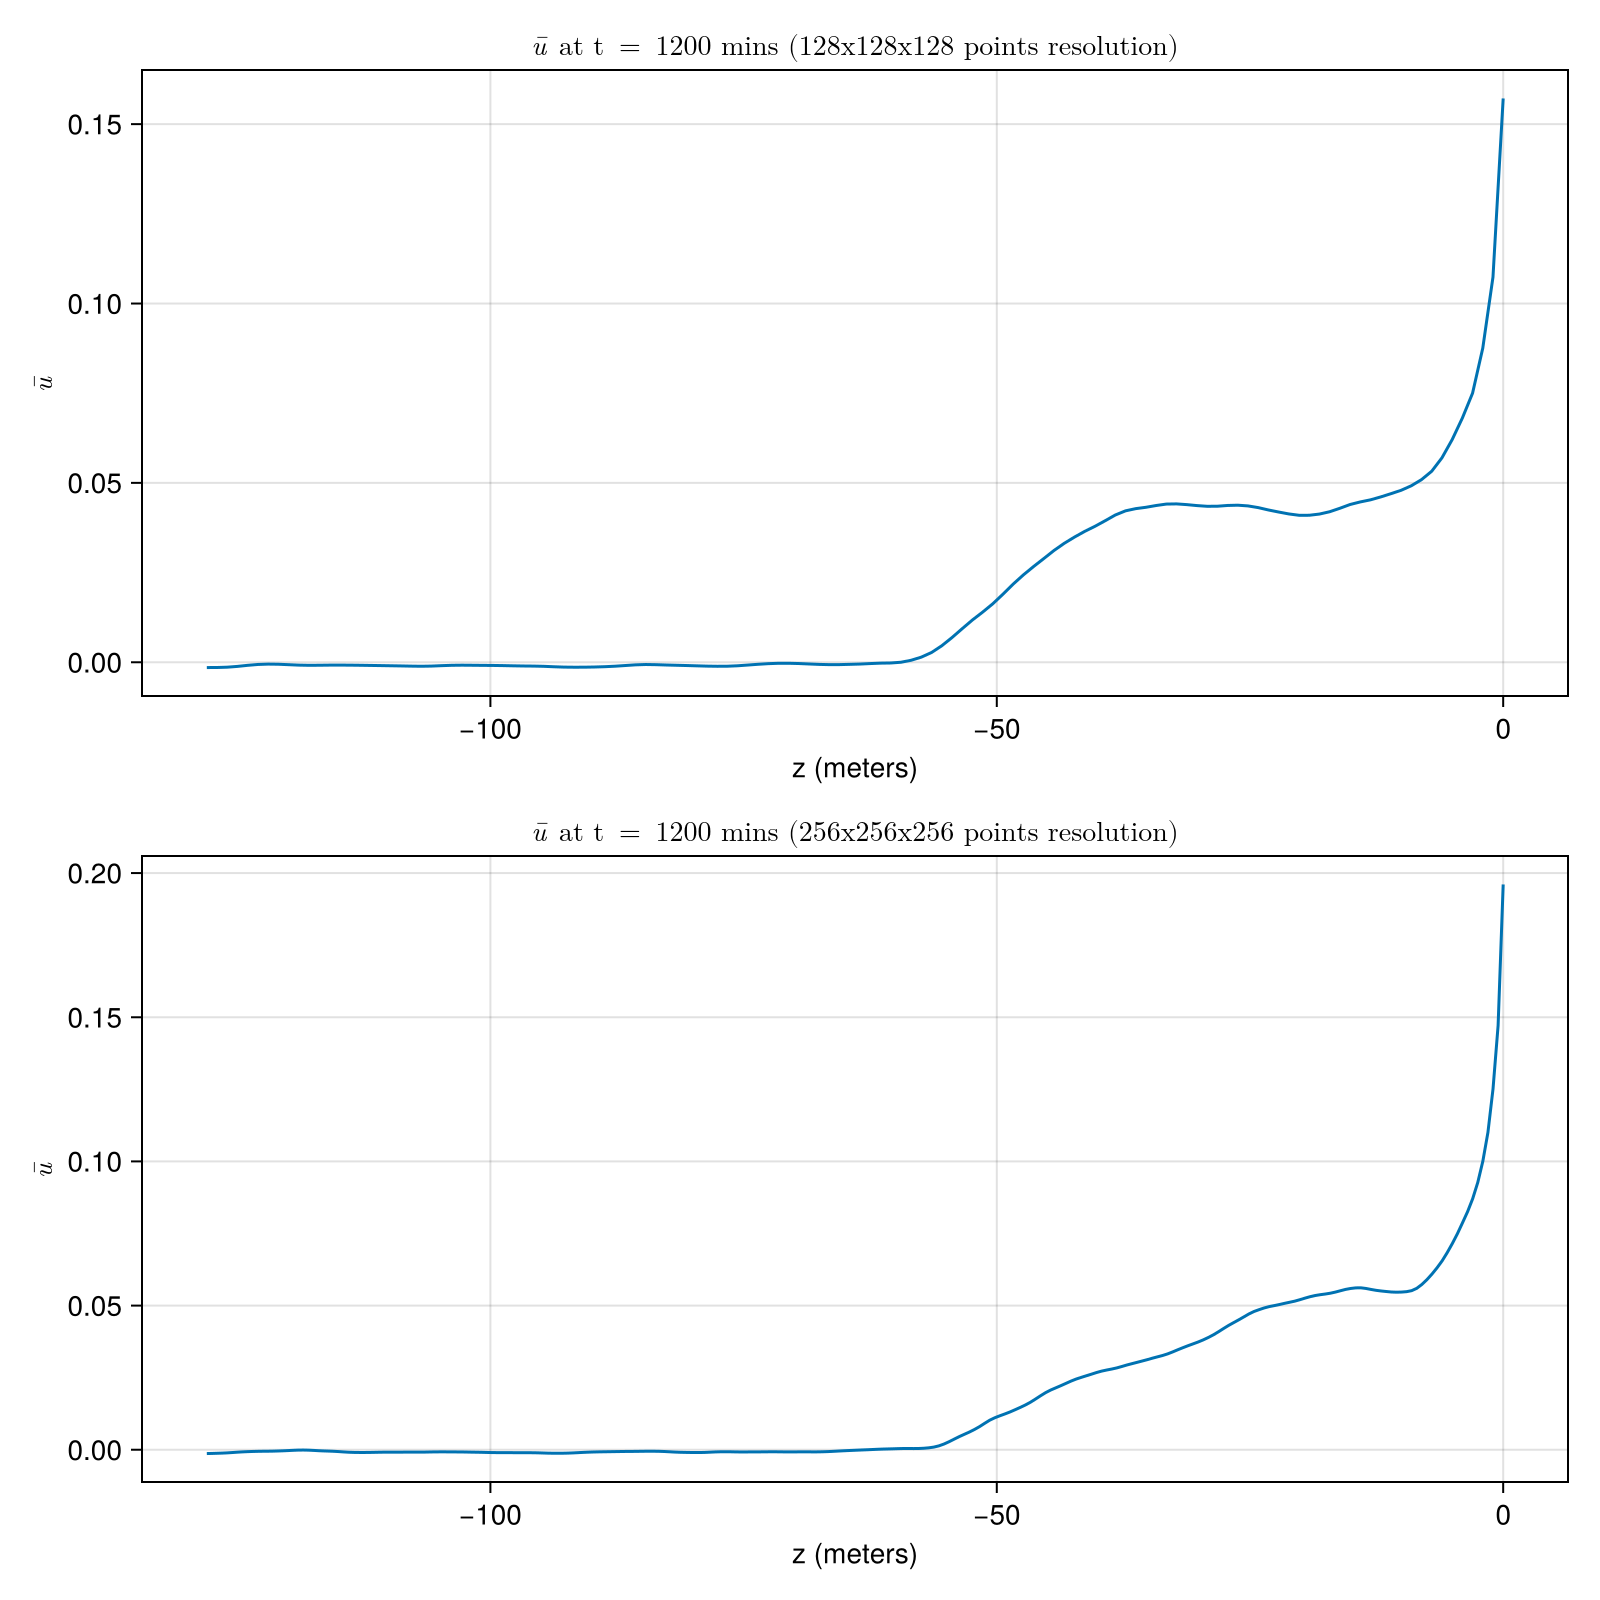

In [6]:
plot_data(u_bar, L"\bar{u}")

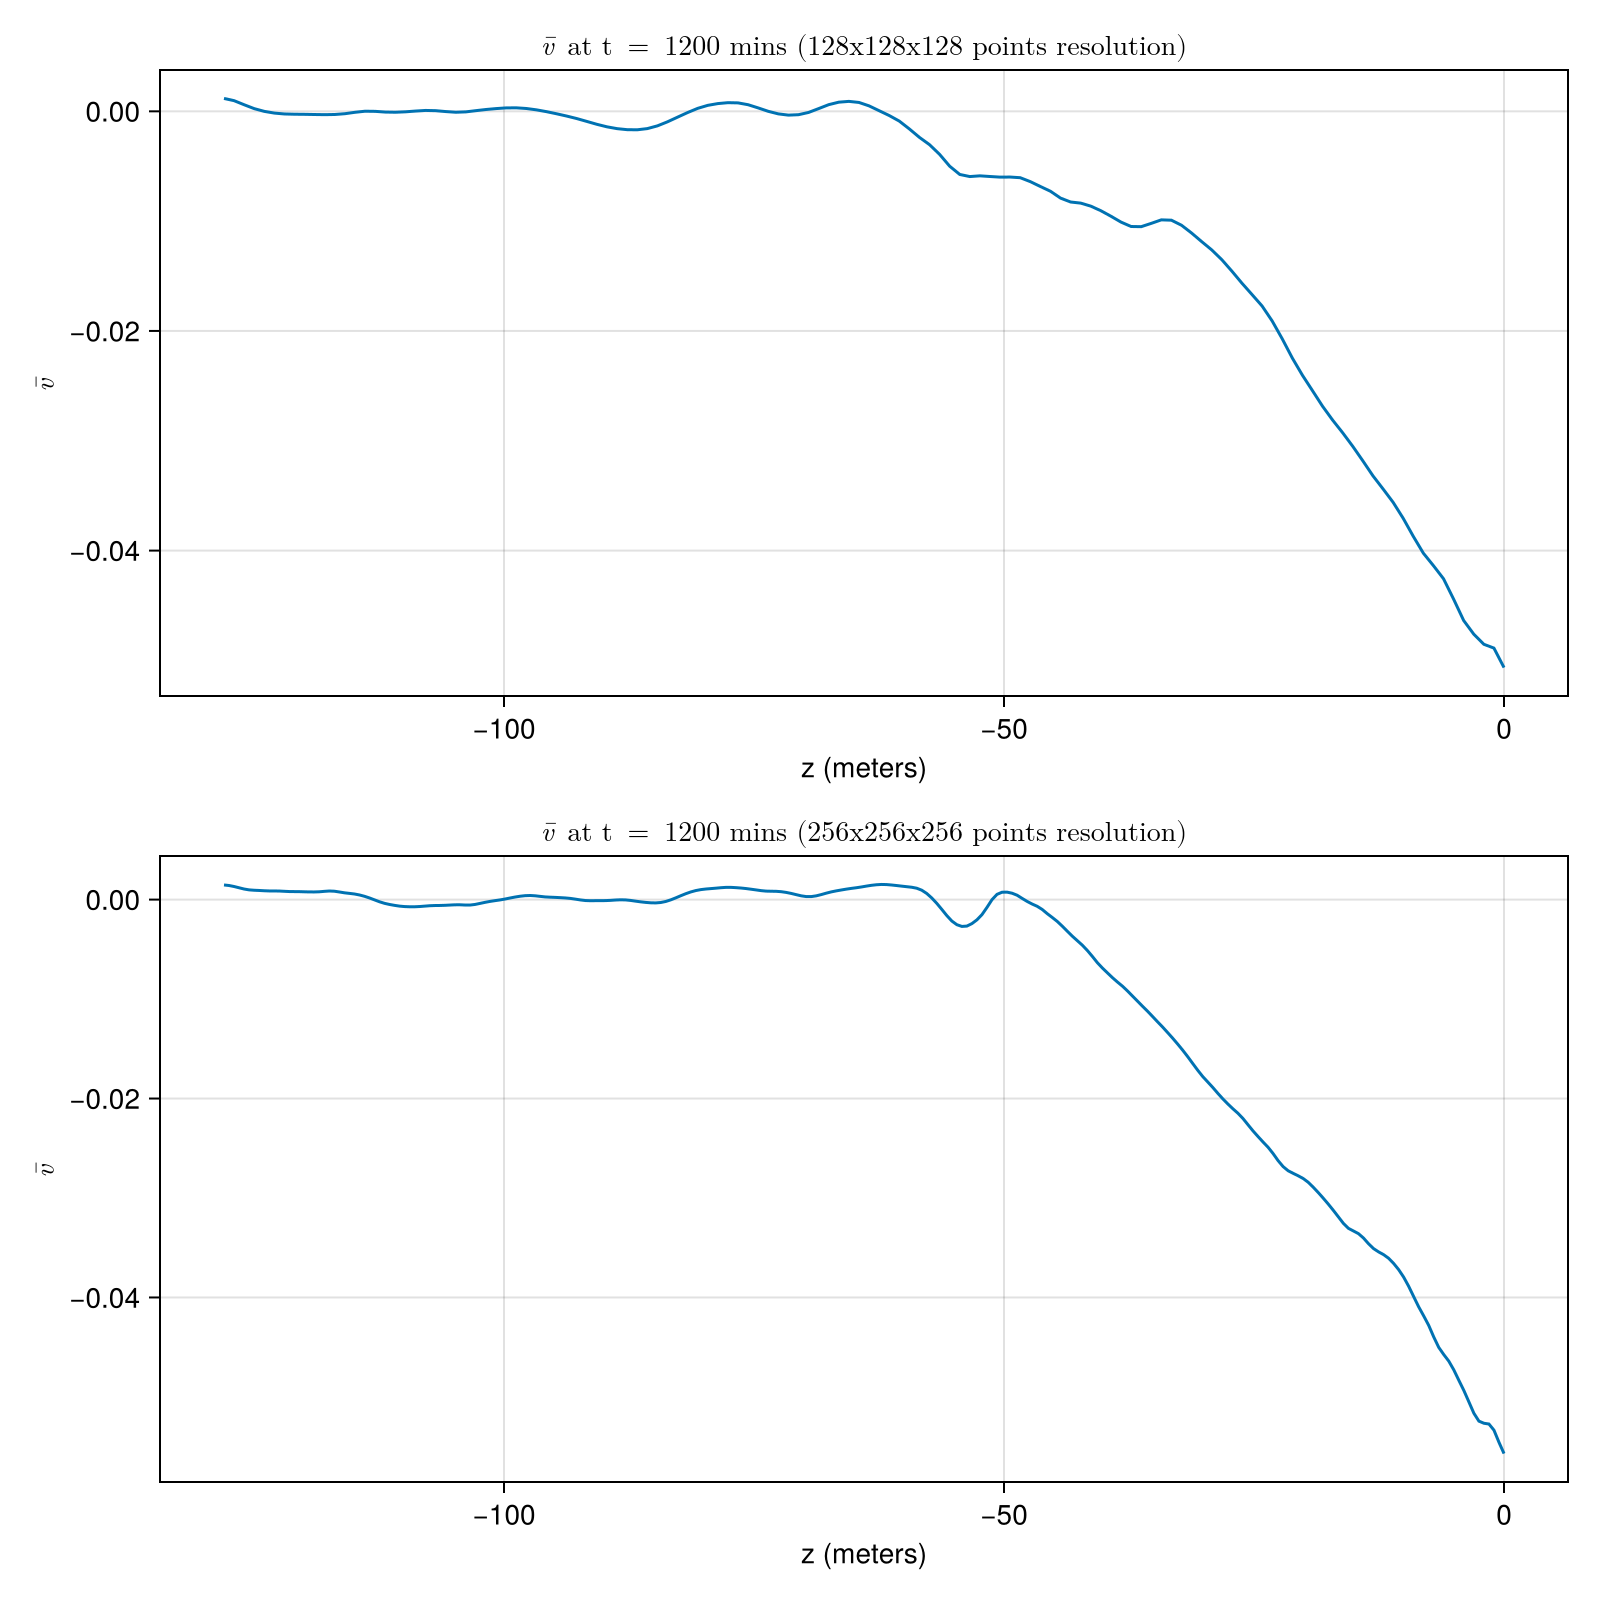

In [7]:
plot_data(v_bar, L"\bar{v}")

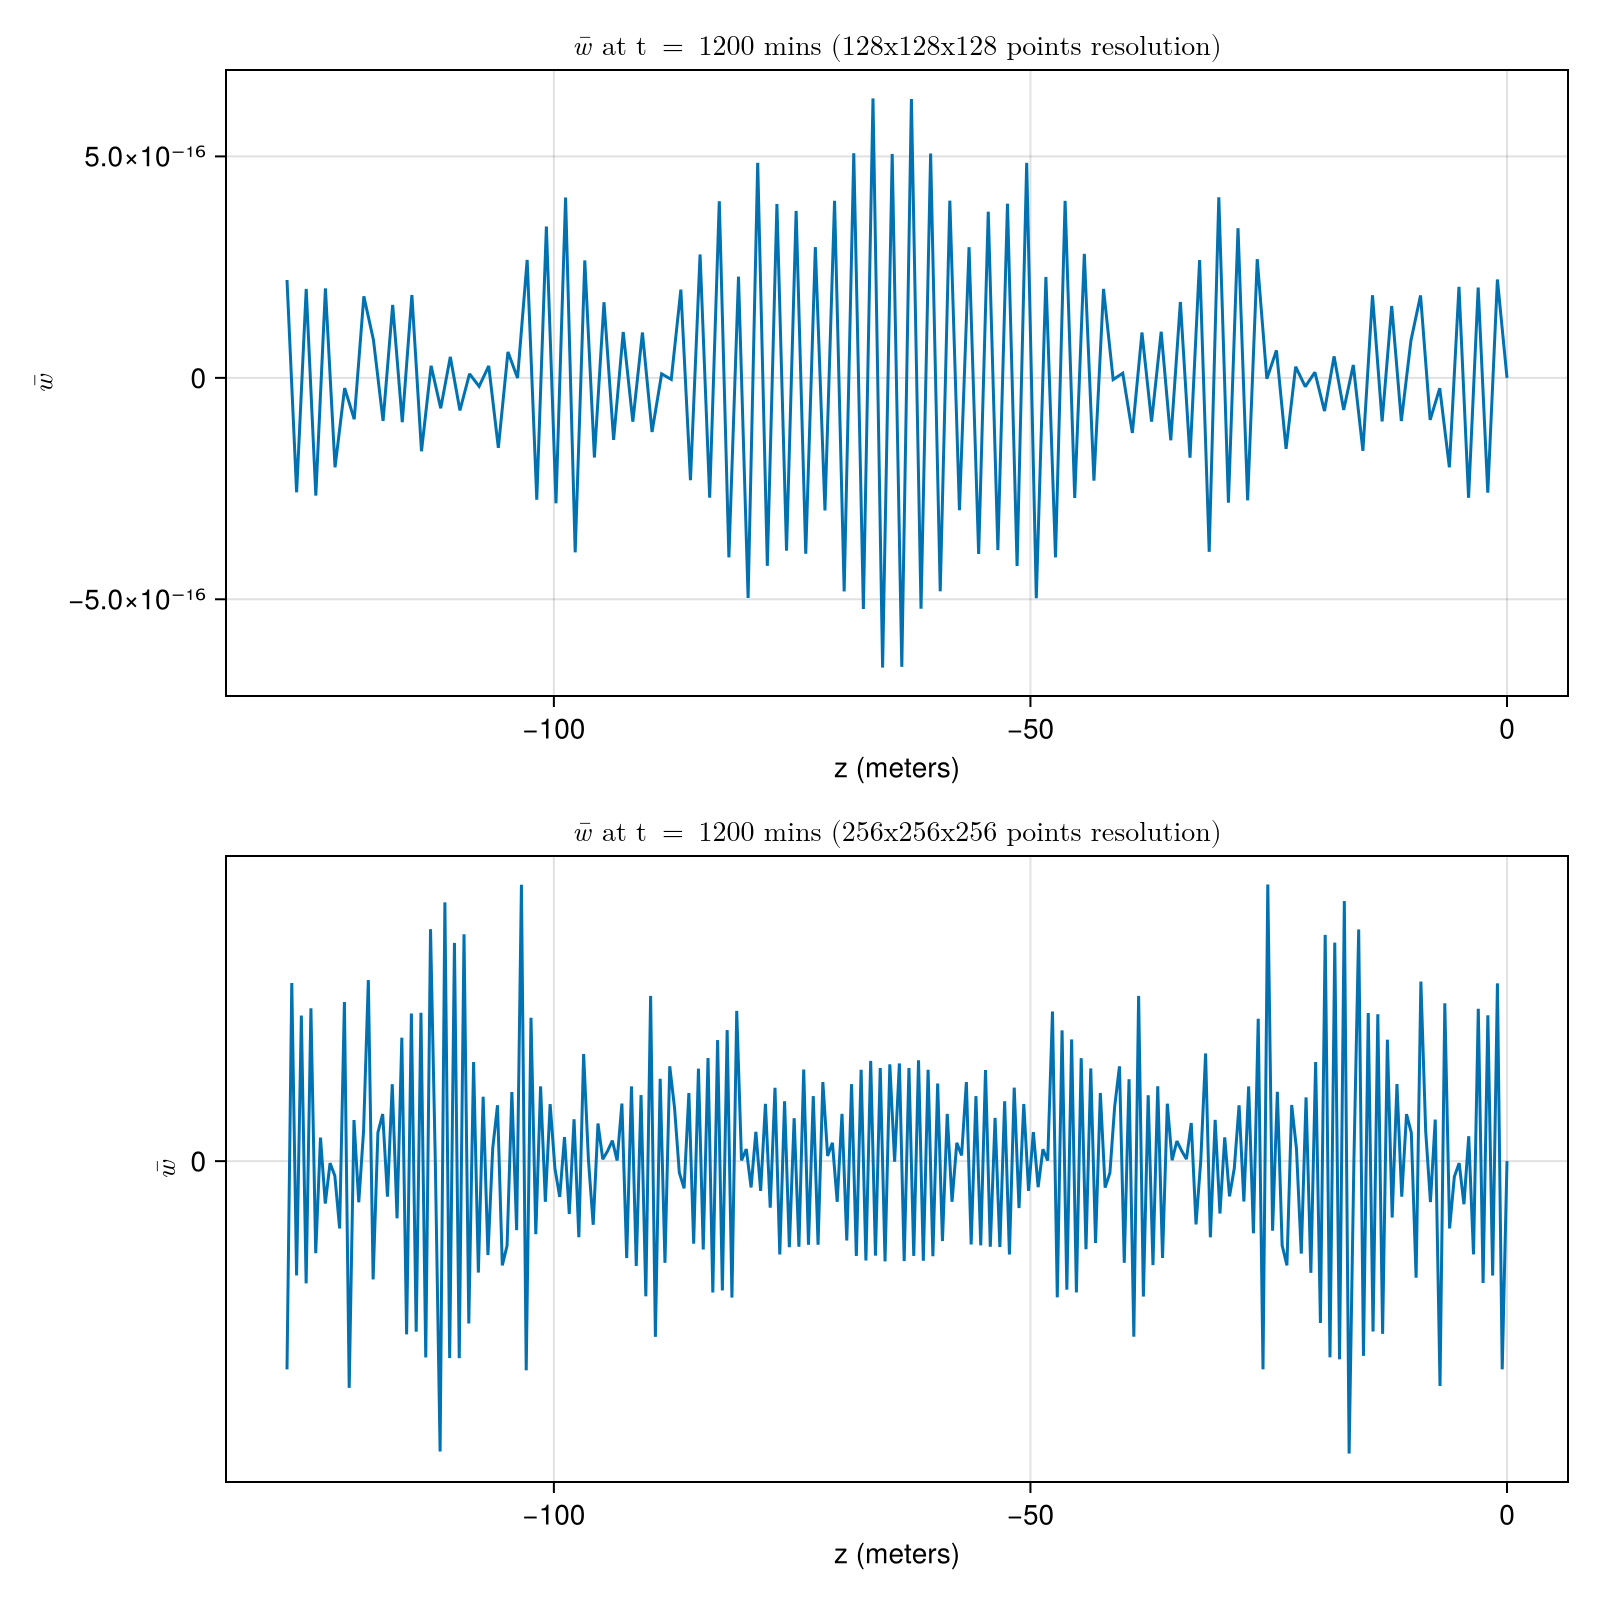

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


In [8]:
plot_data(w_bar, L"\bar{w}")

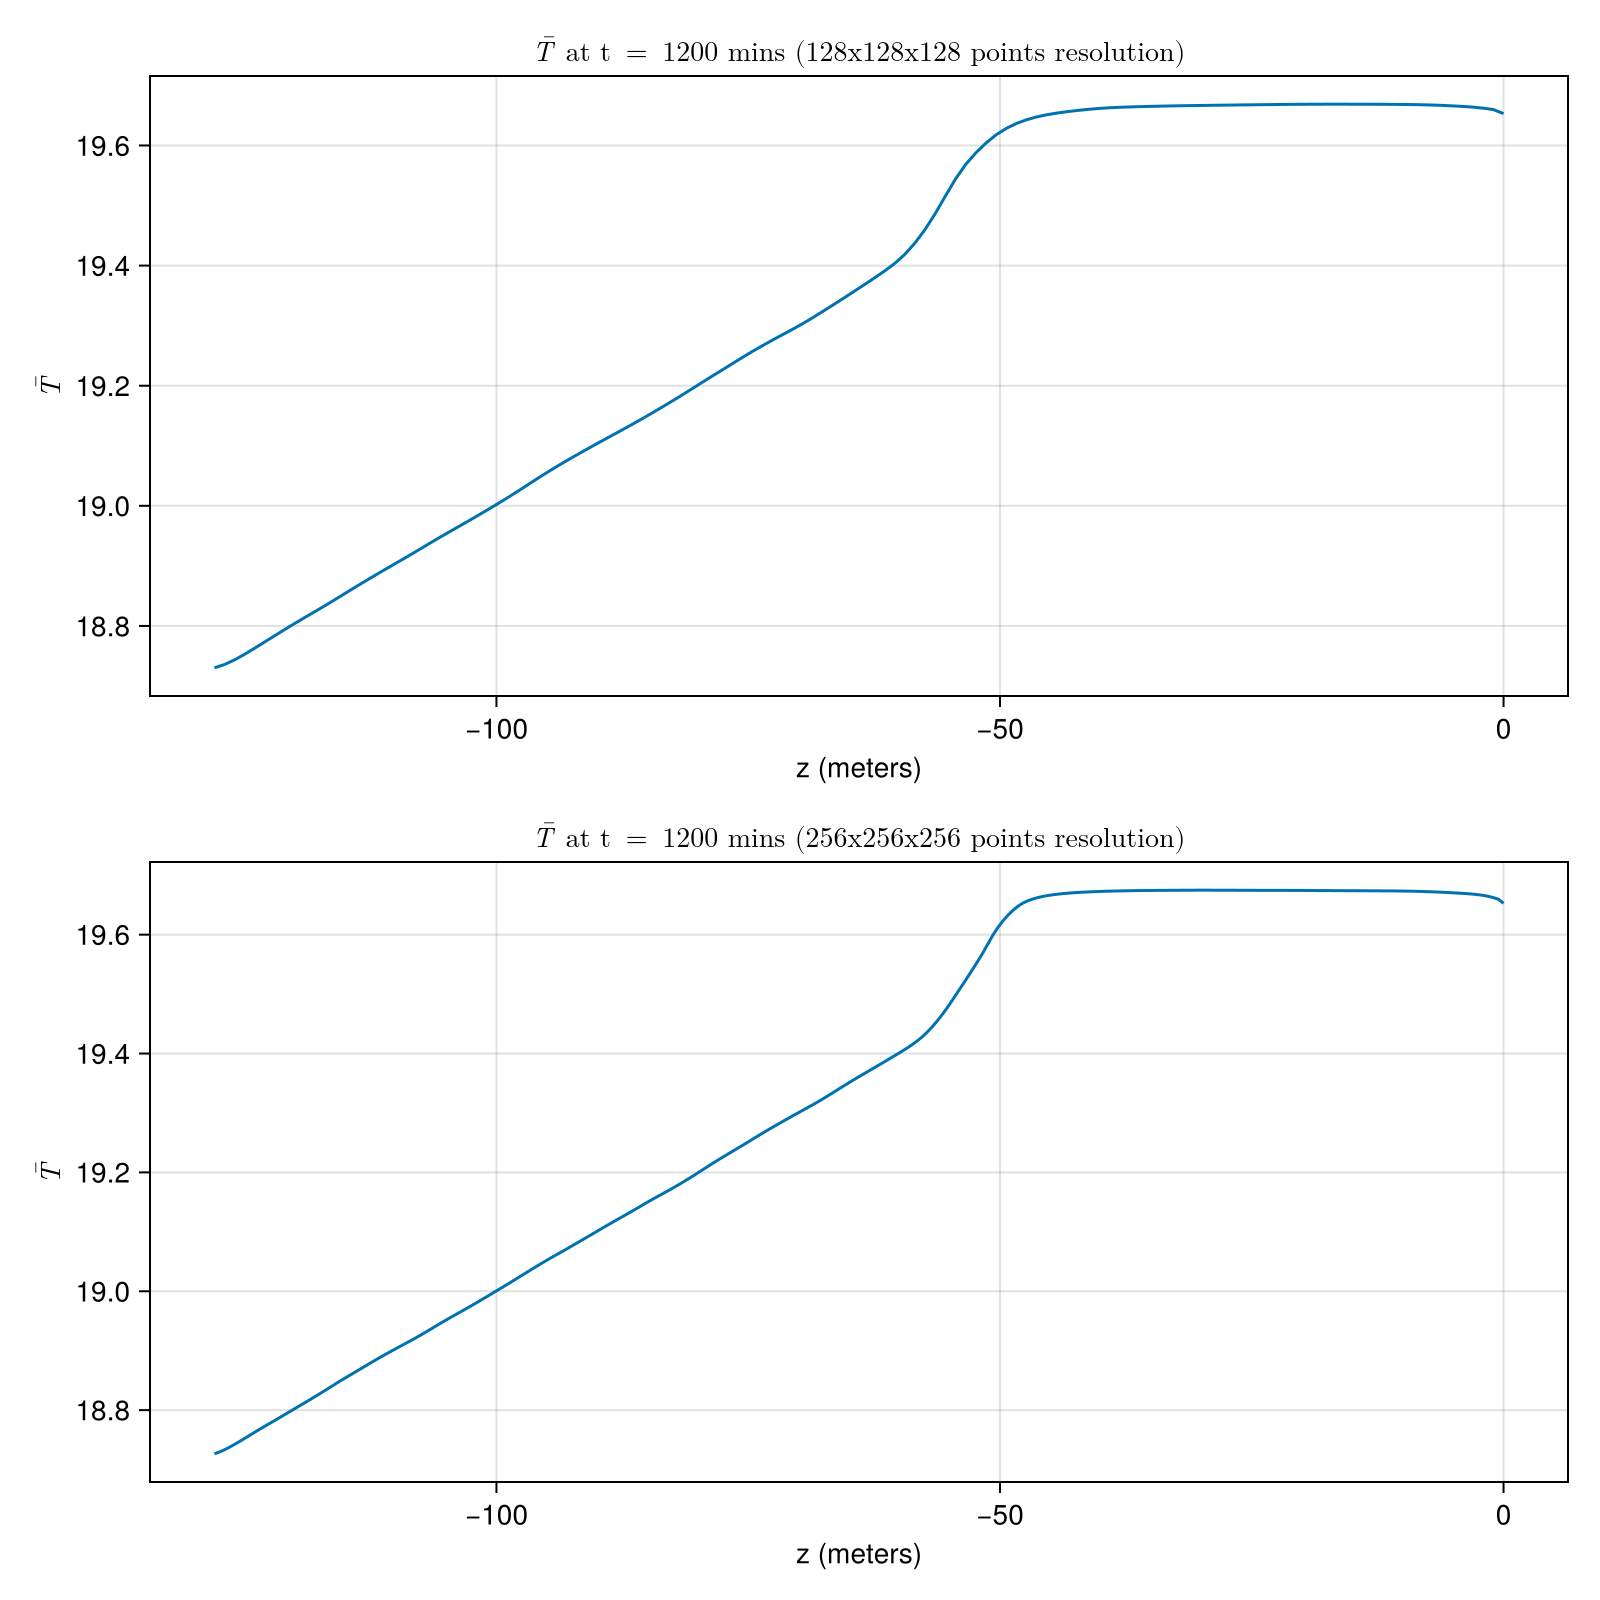

In [9]:
plot_data(T_bar, L"\bar{T}")

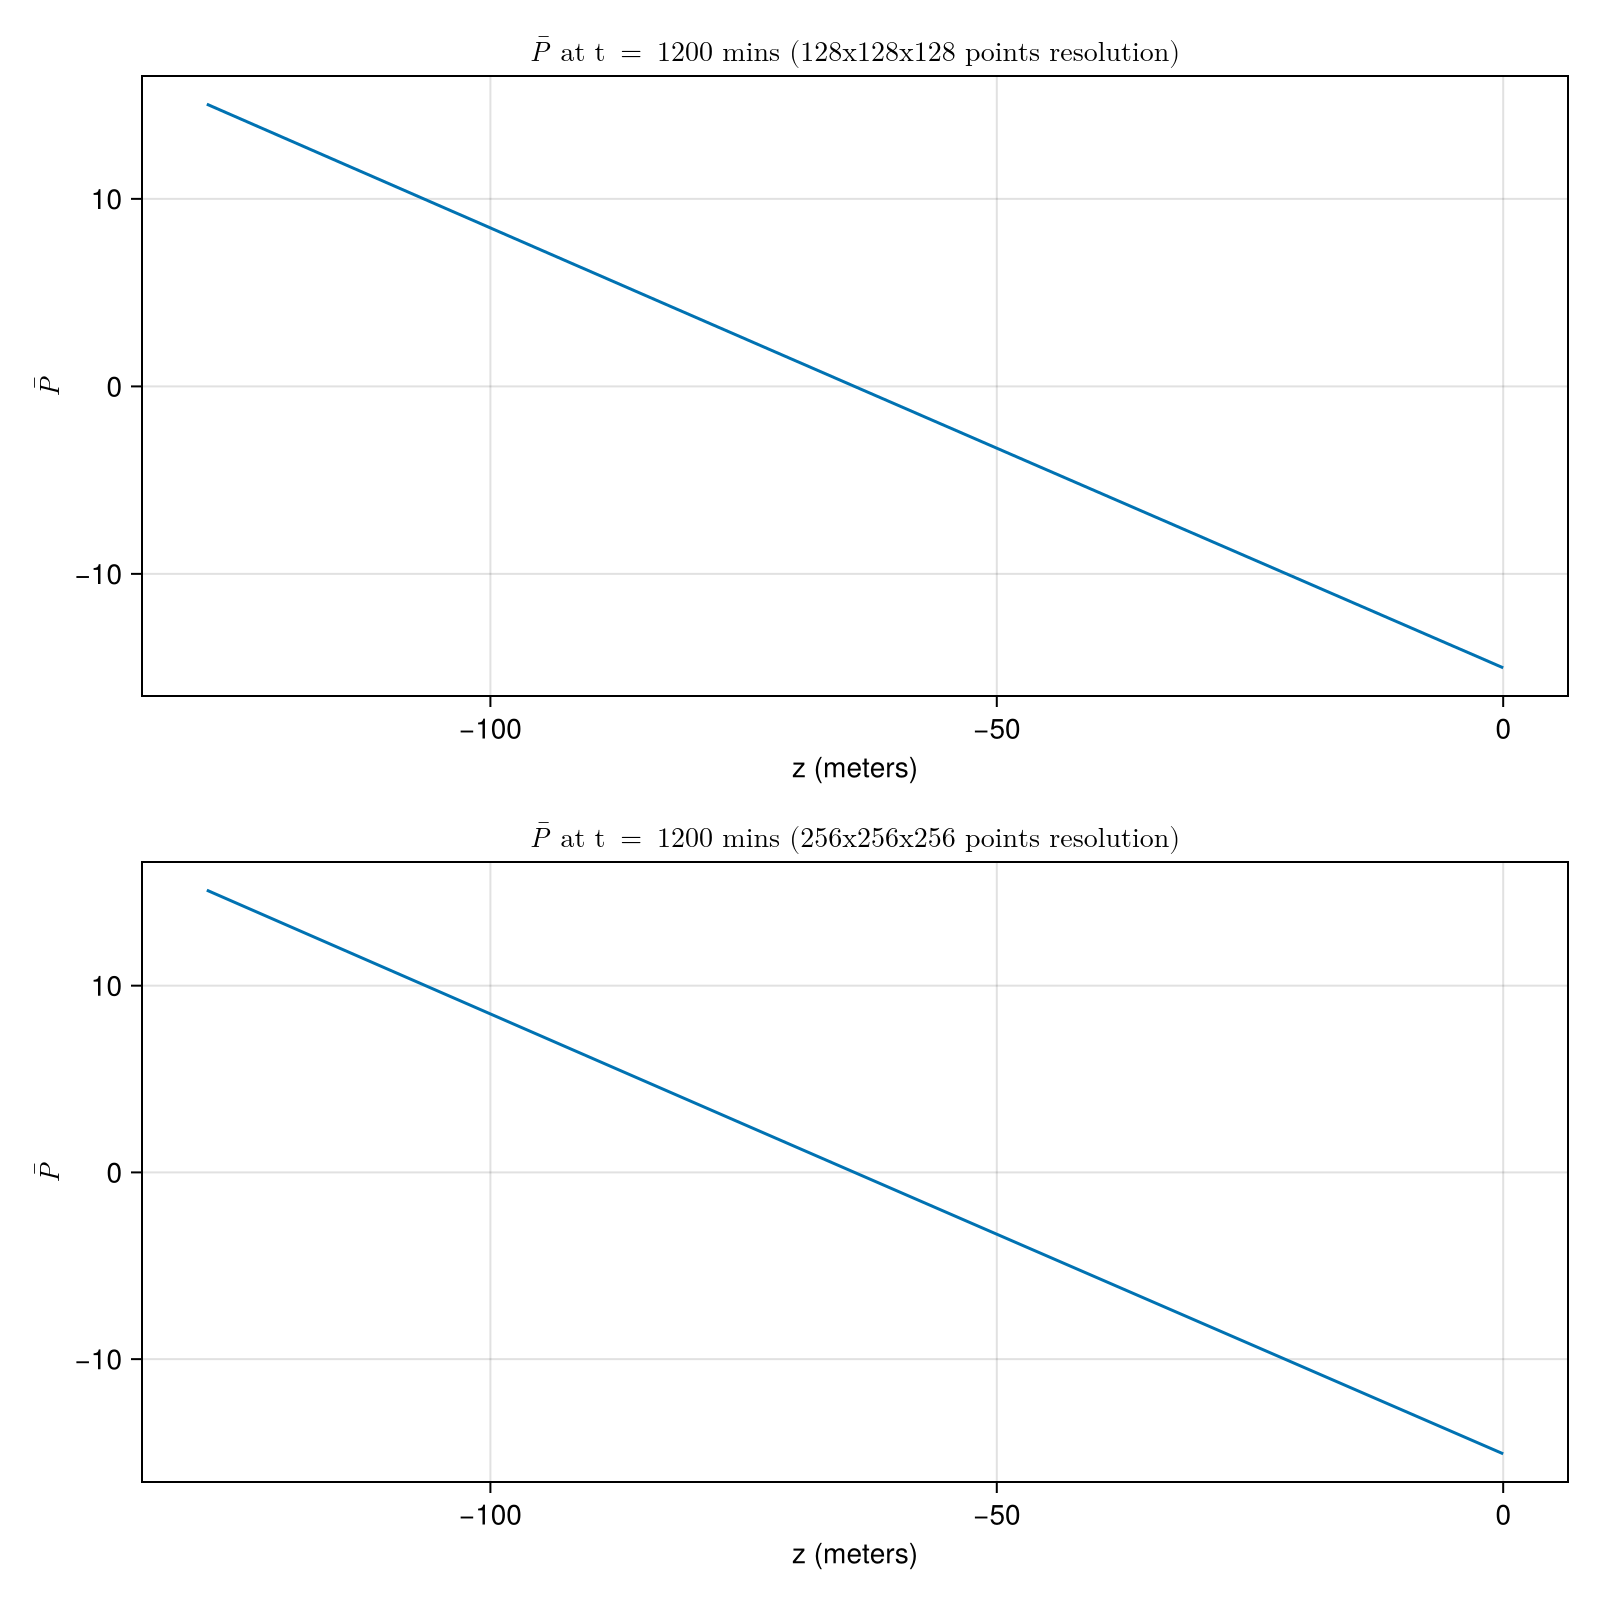

In [10]:
plot_data(P_bar, L"\bar{P}")

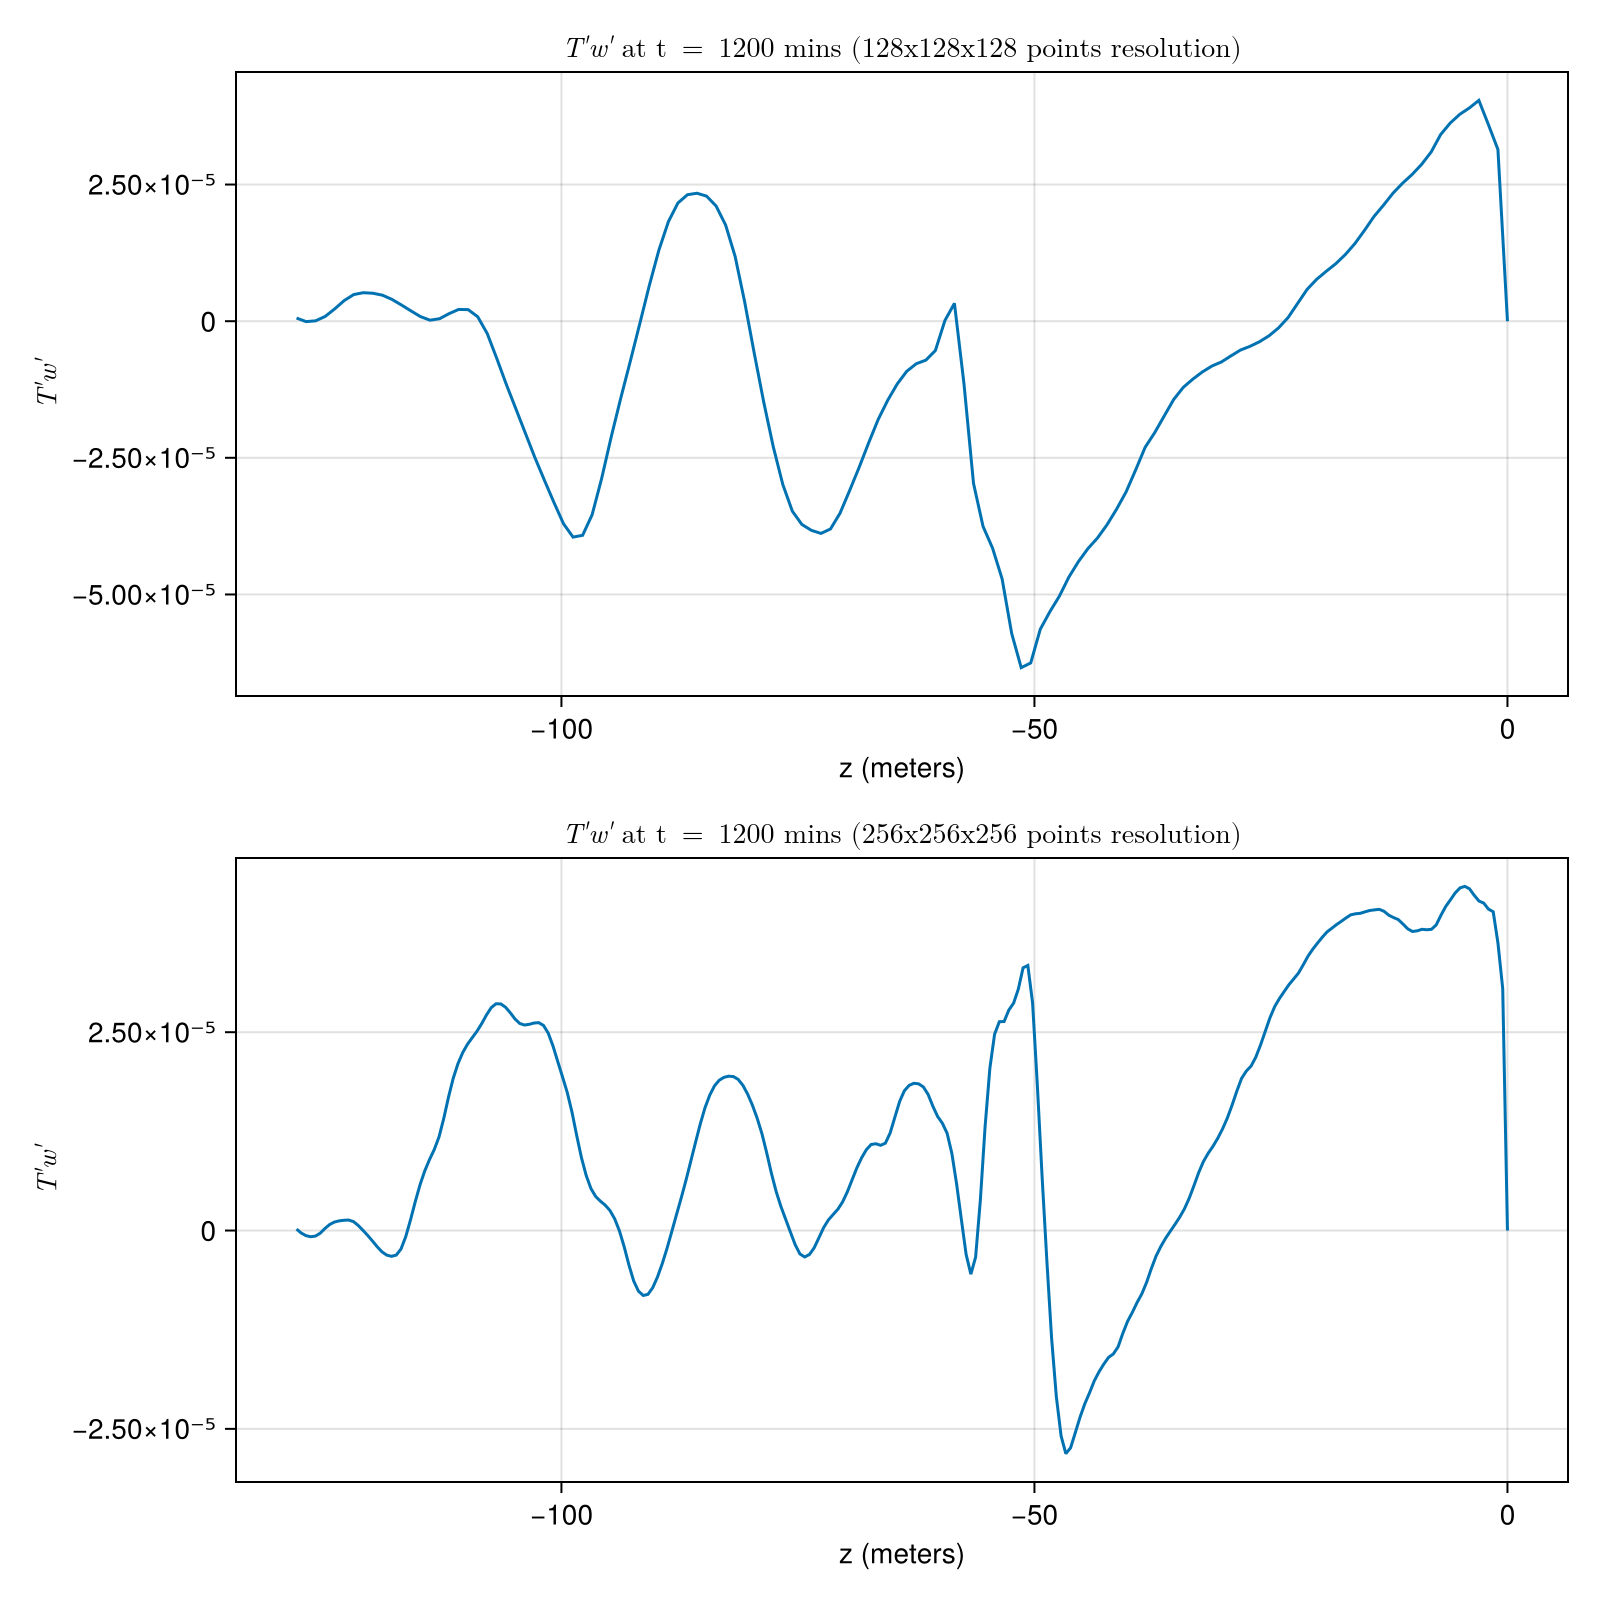

In [11]:
plot_data(T_w_bar, L"T'w'")

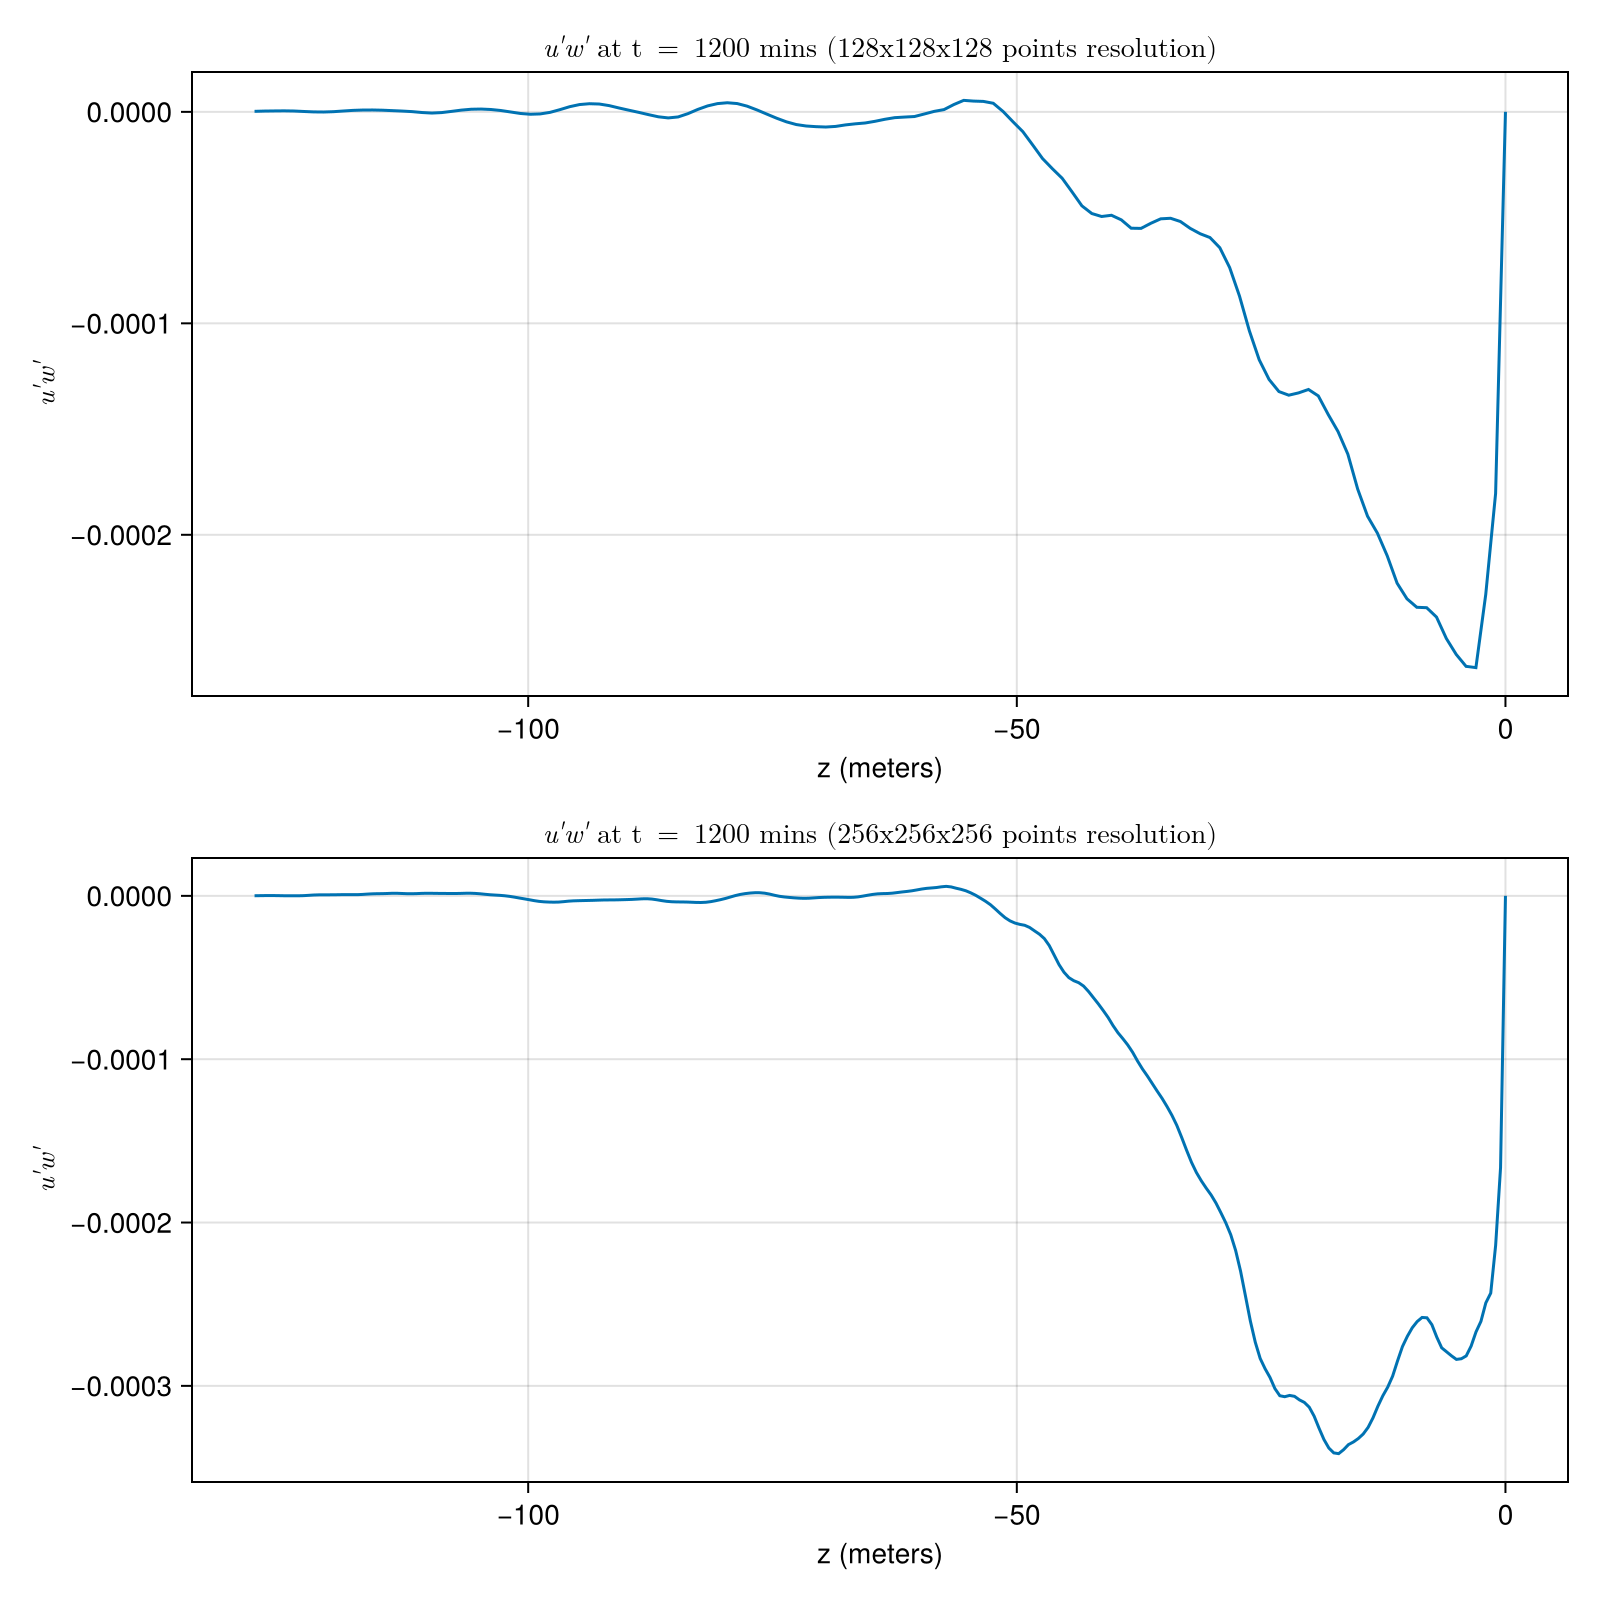

In [12]:
plot_data(u_w_bar, L"u'w'")

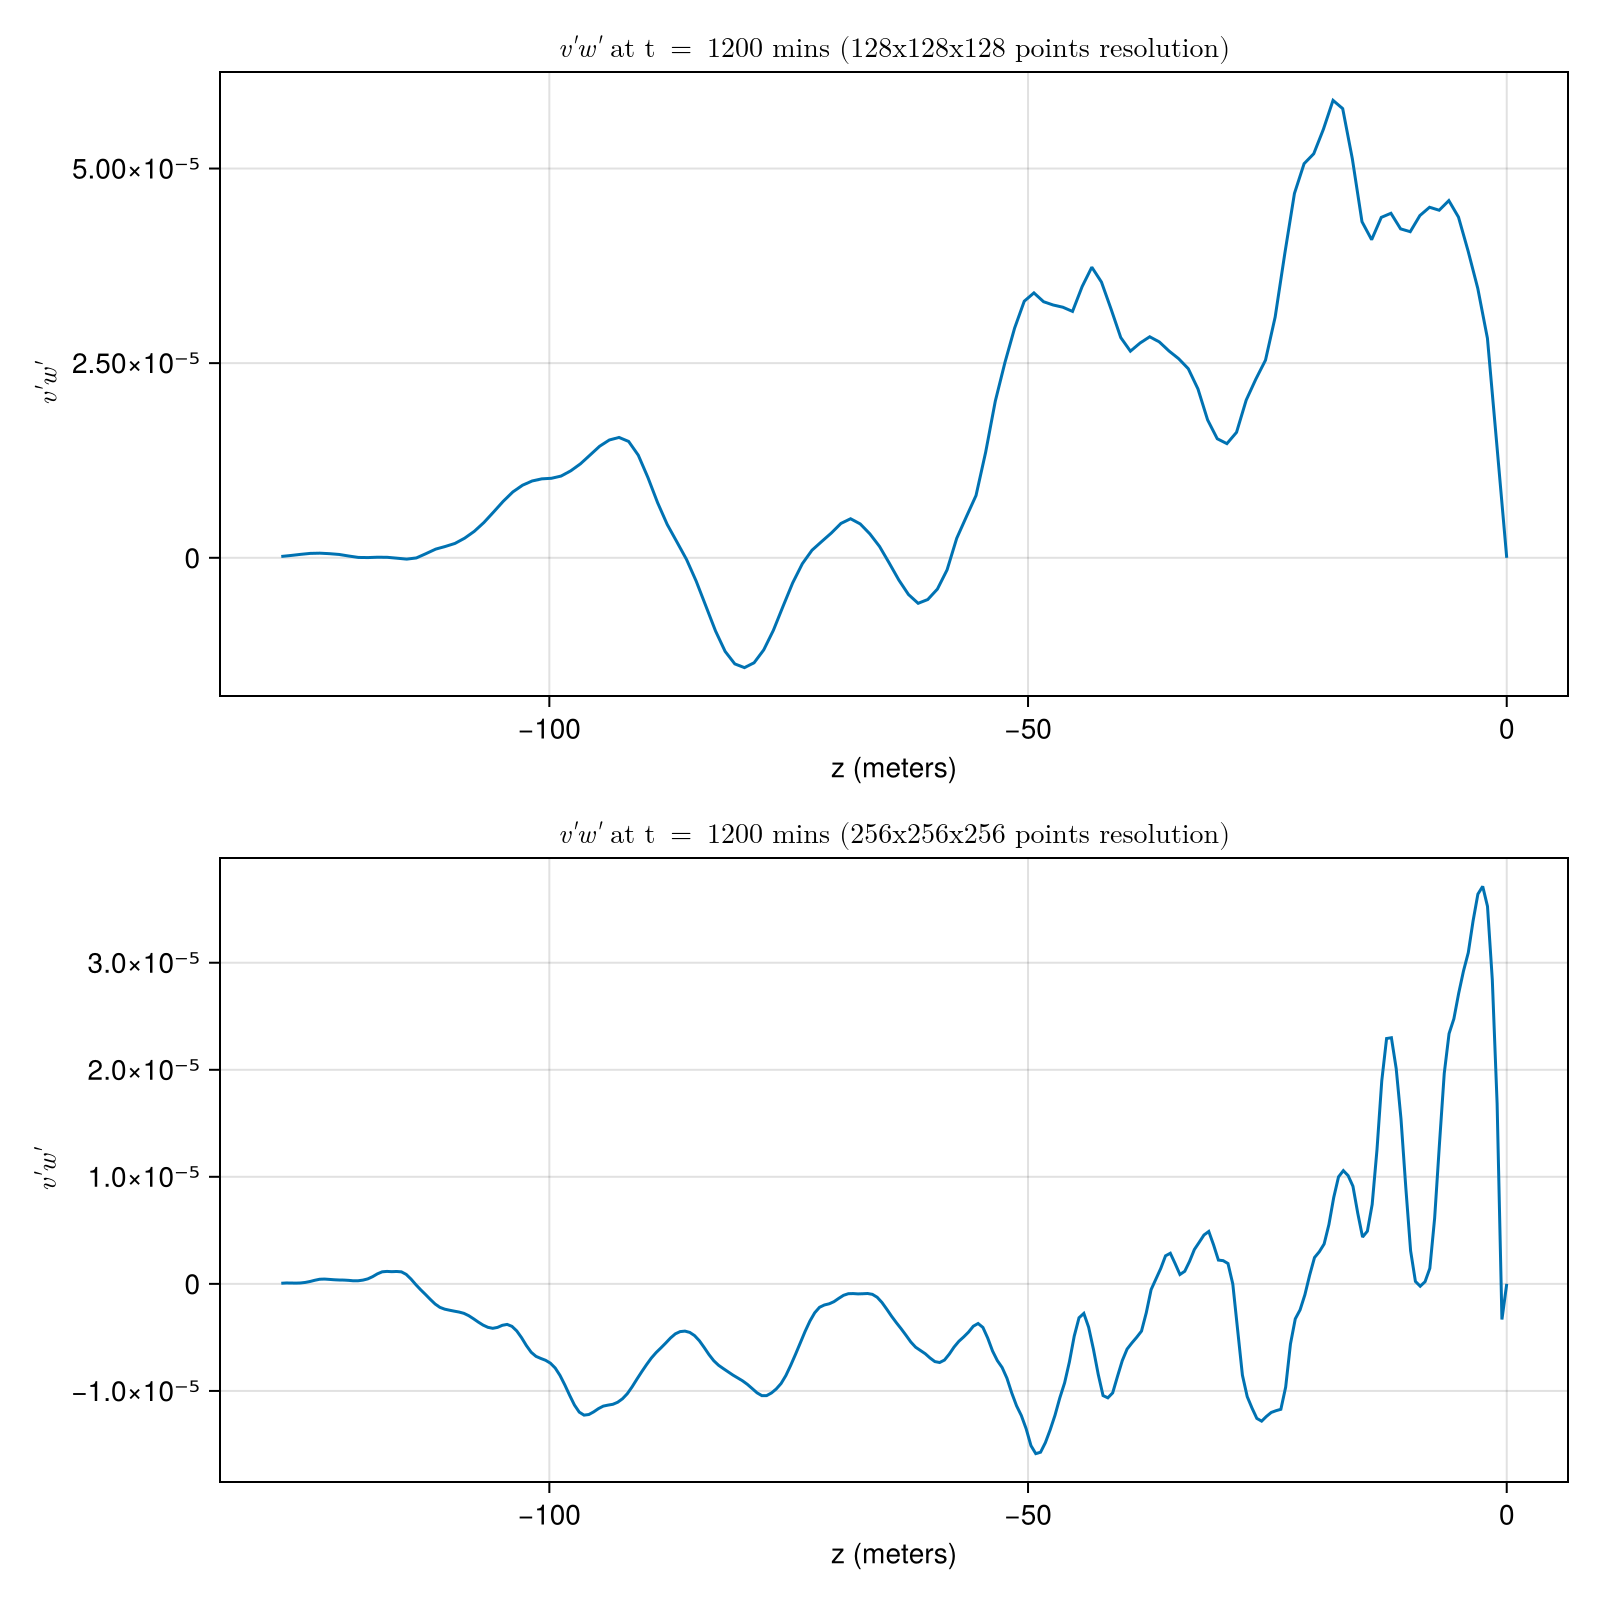

In [13]:
plot_data(v_w_bar, L"v'w'")

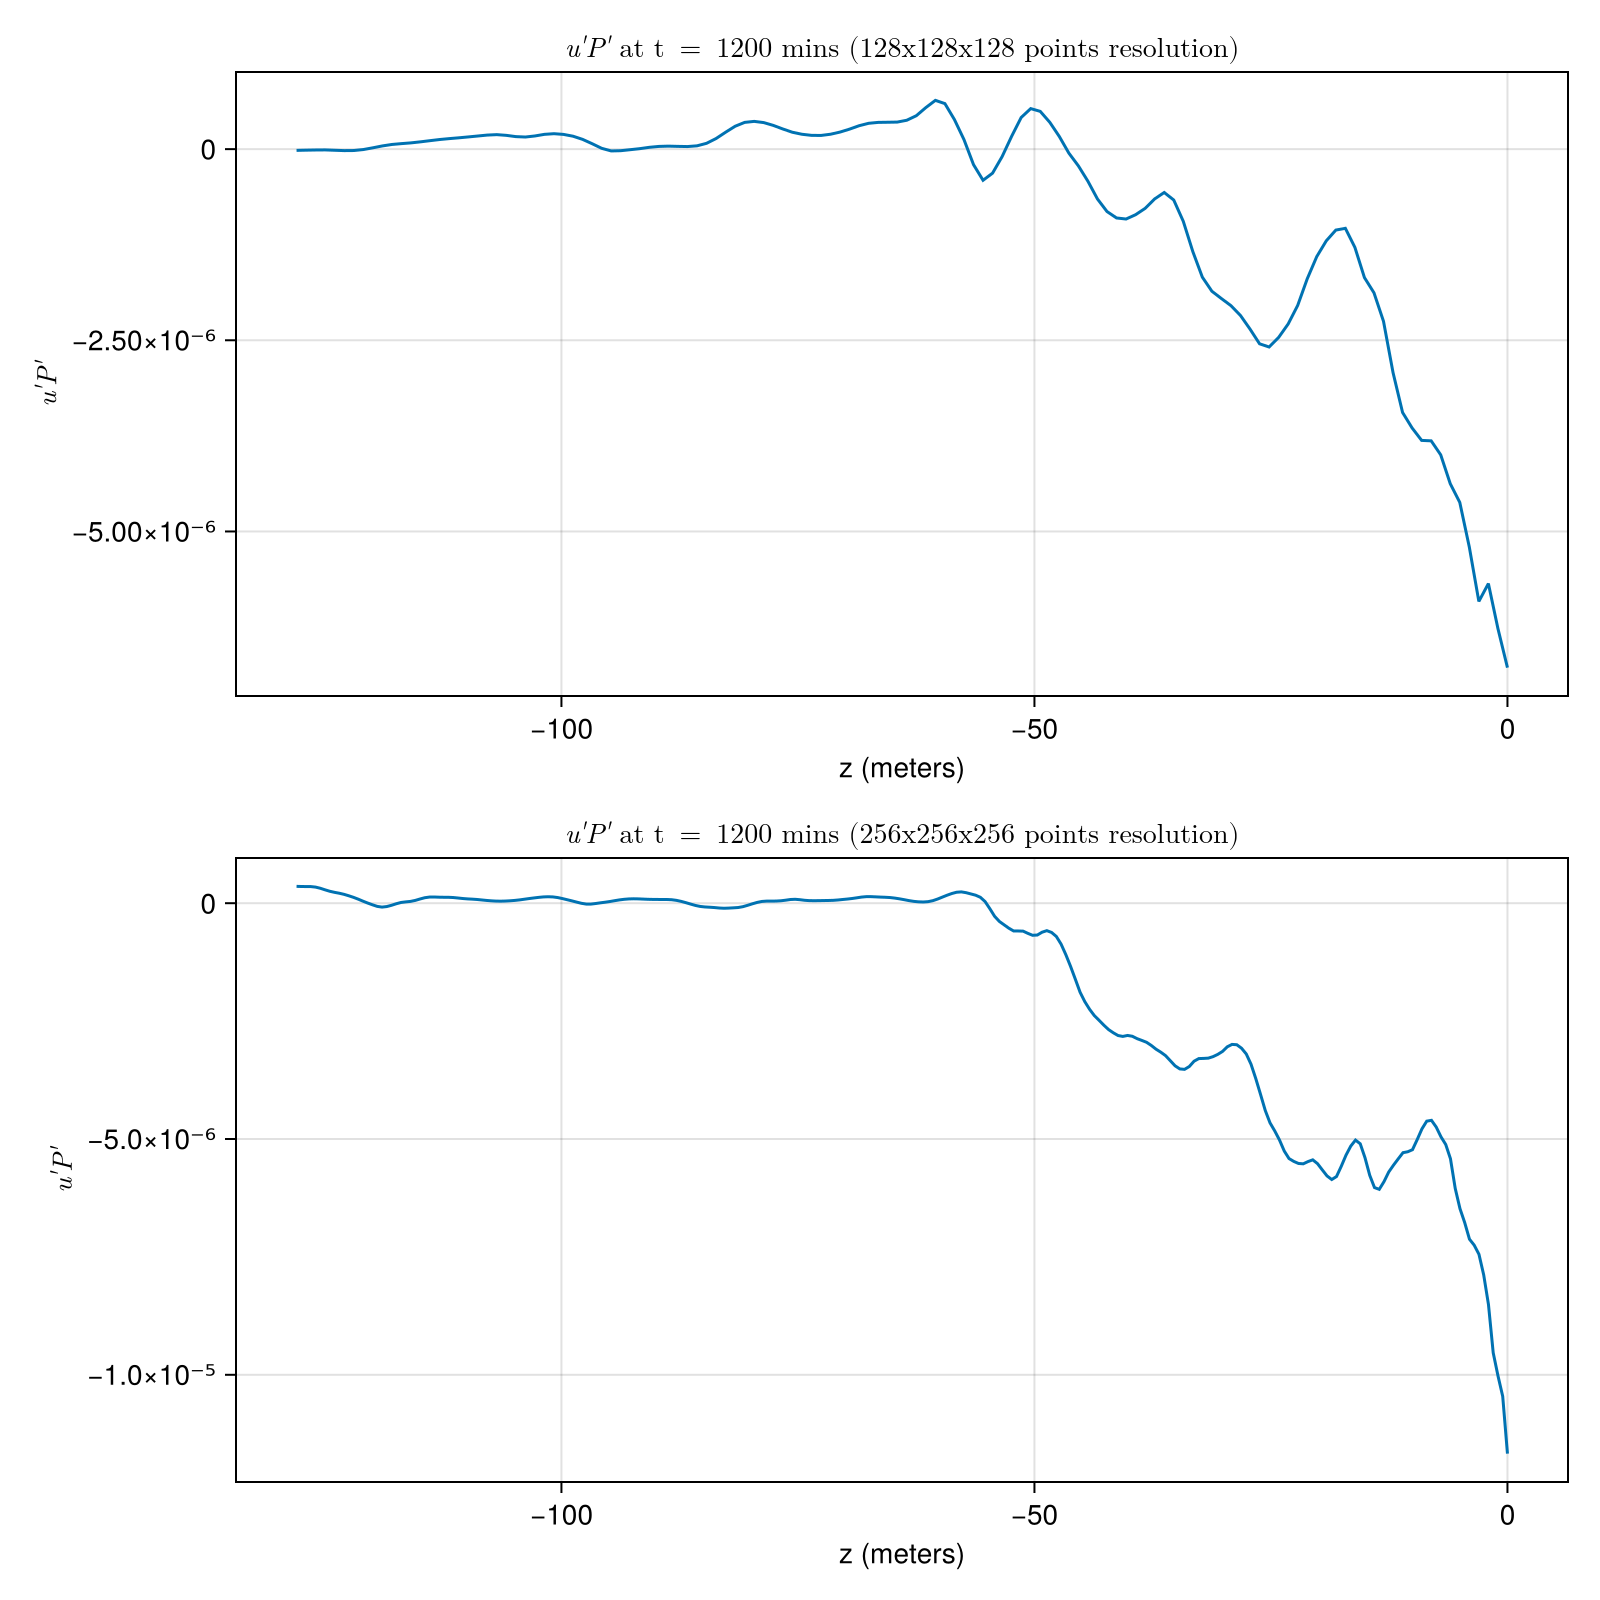

In [14]:
plot_data(u_P_bar, L"u'P'")

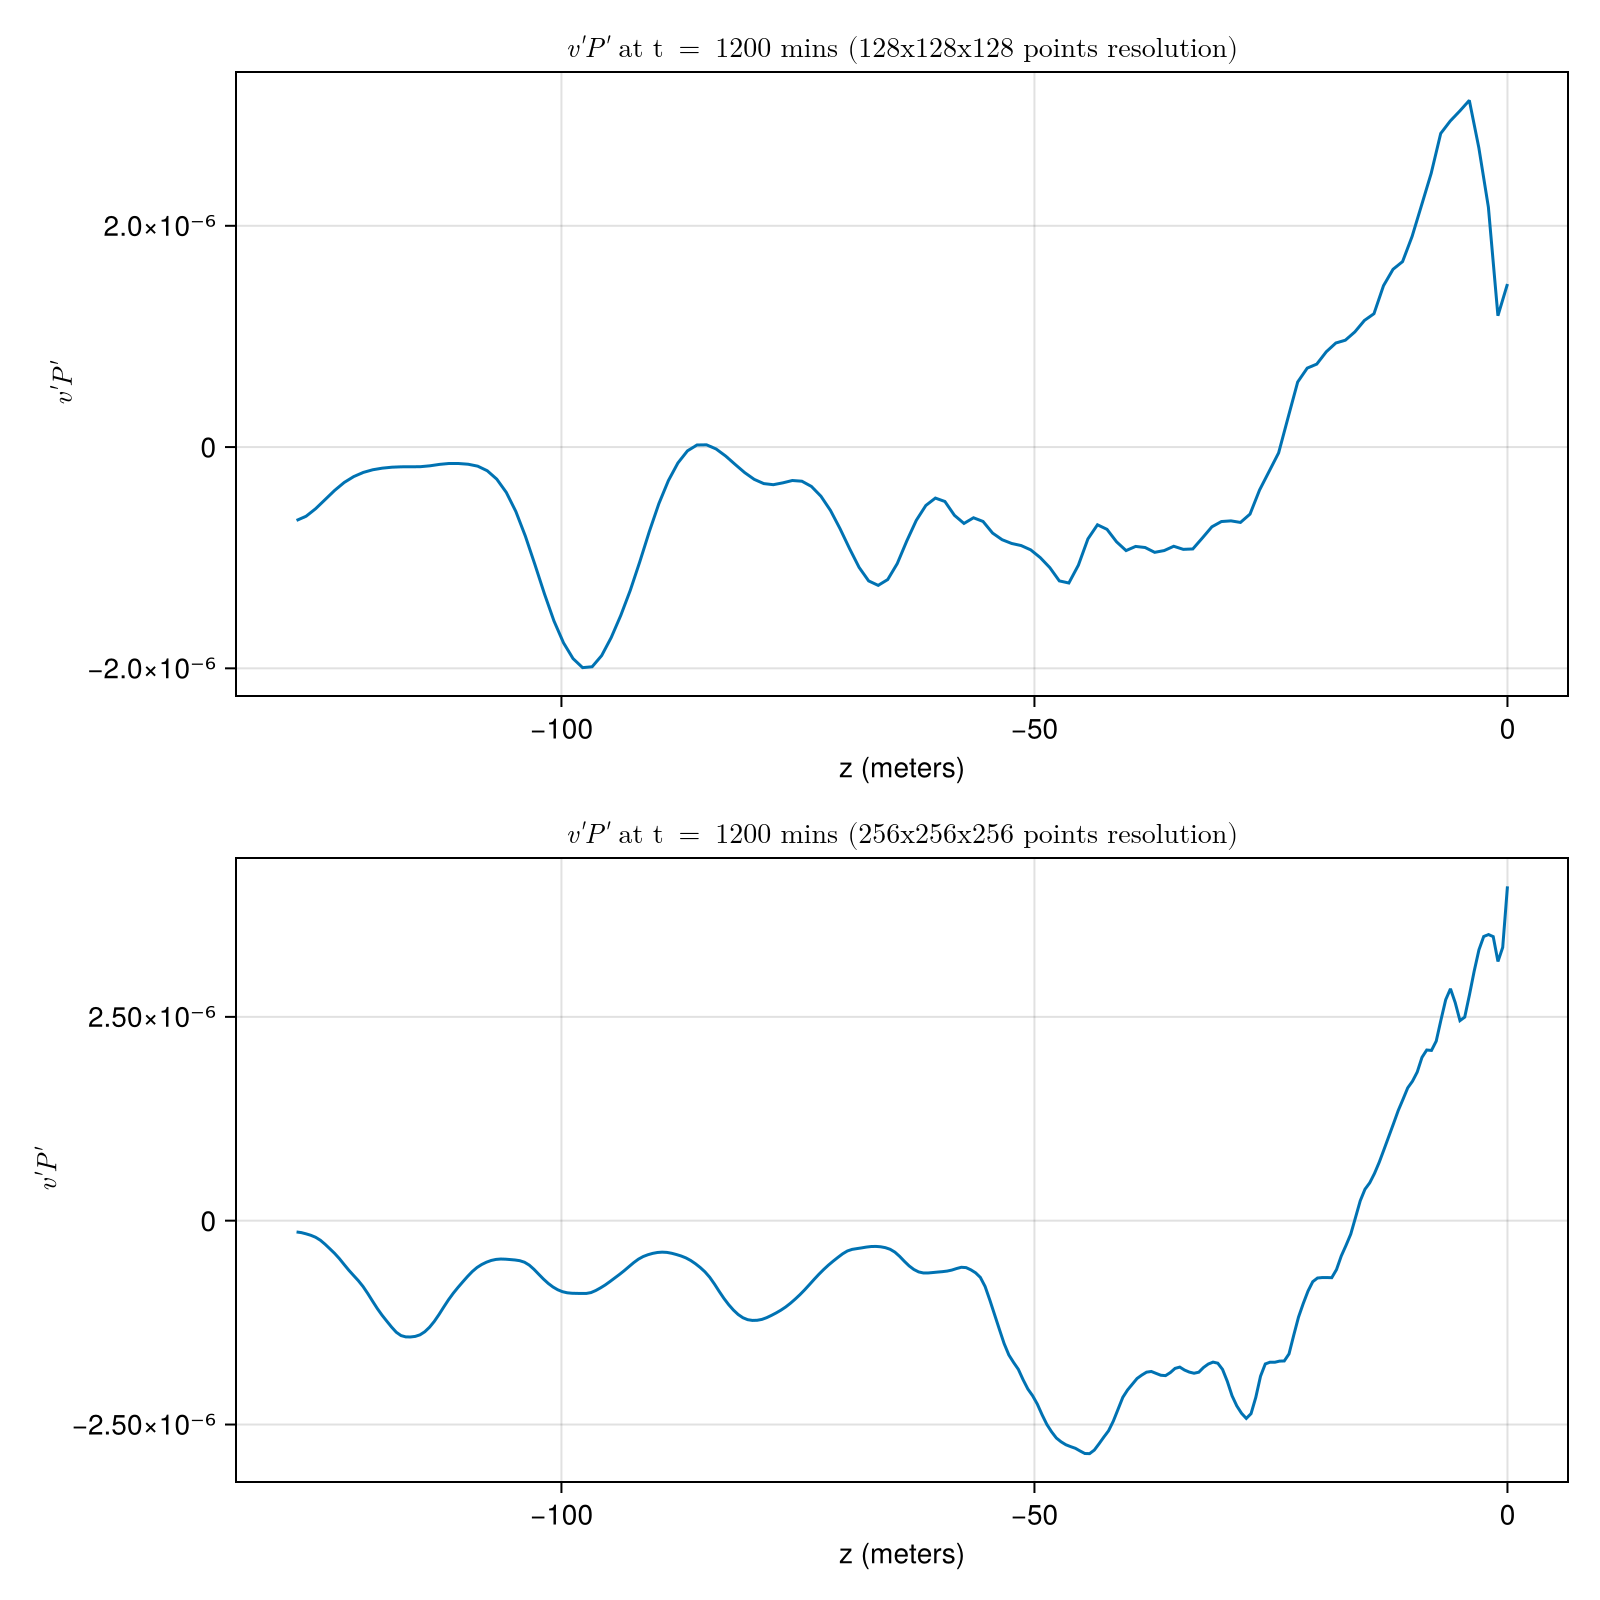

In [15]:
plot_data(v_P_bar, L"v'P'")

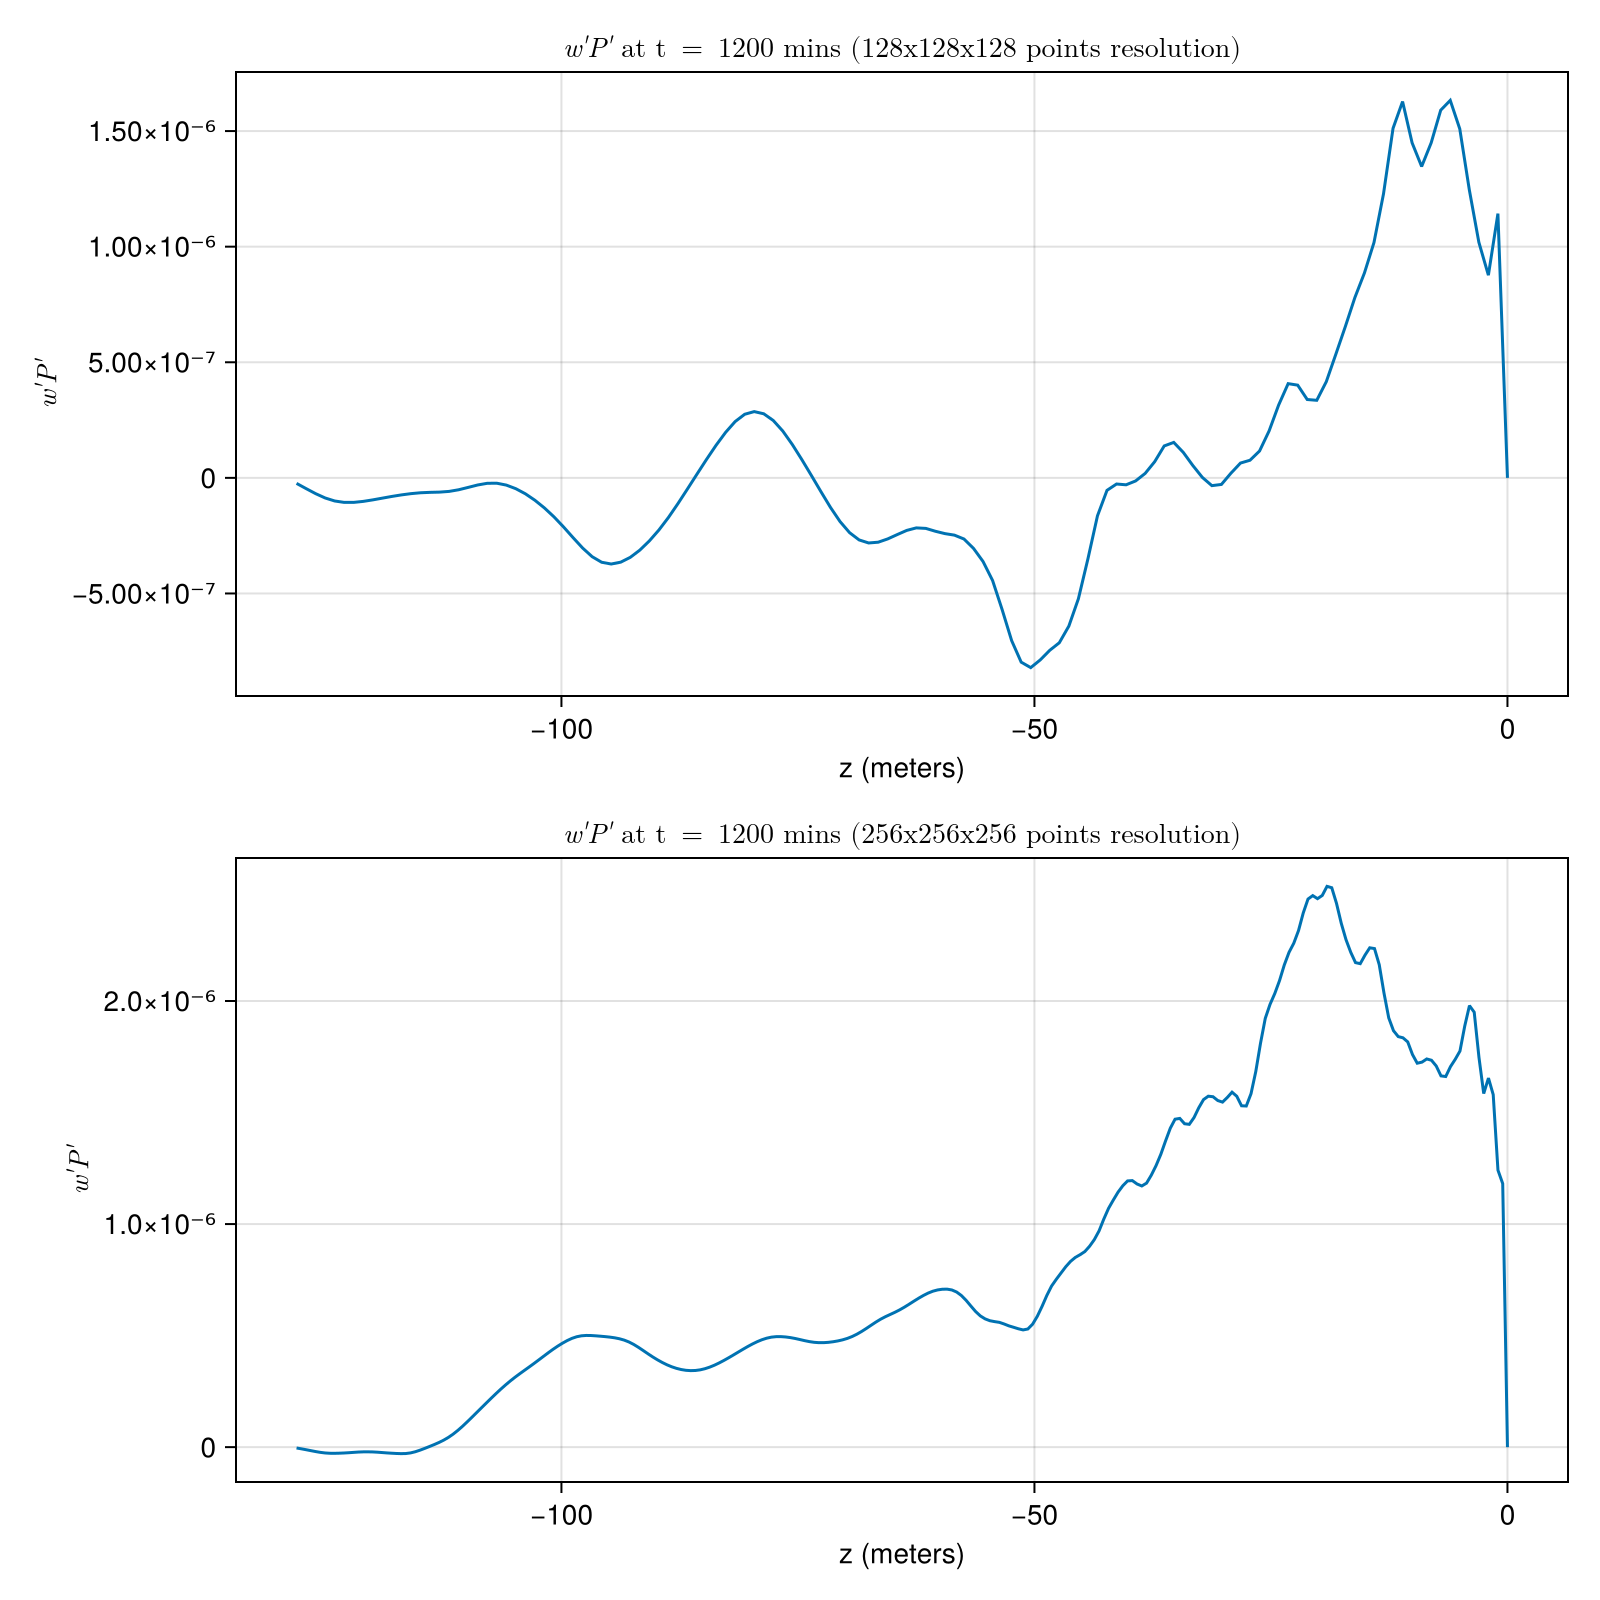

In [16]:
plot_data(w_P_bar, L"w'P'")

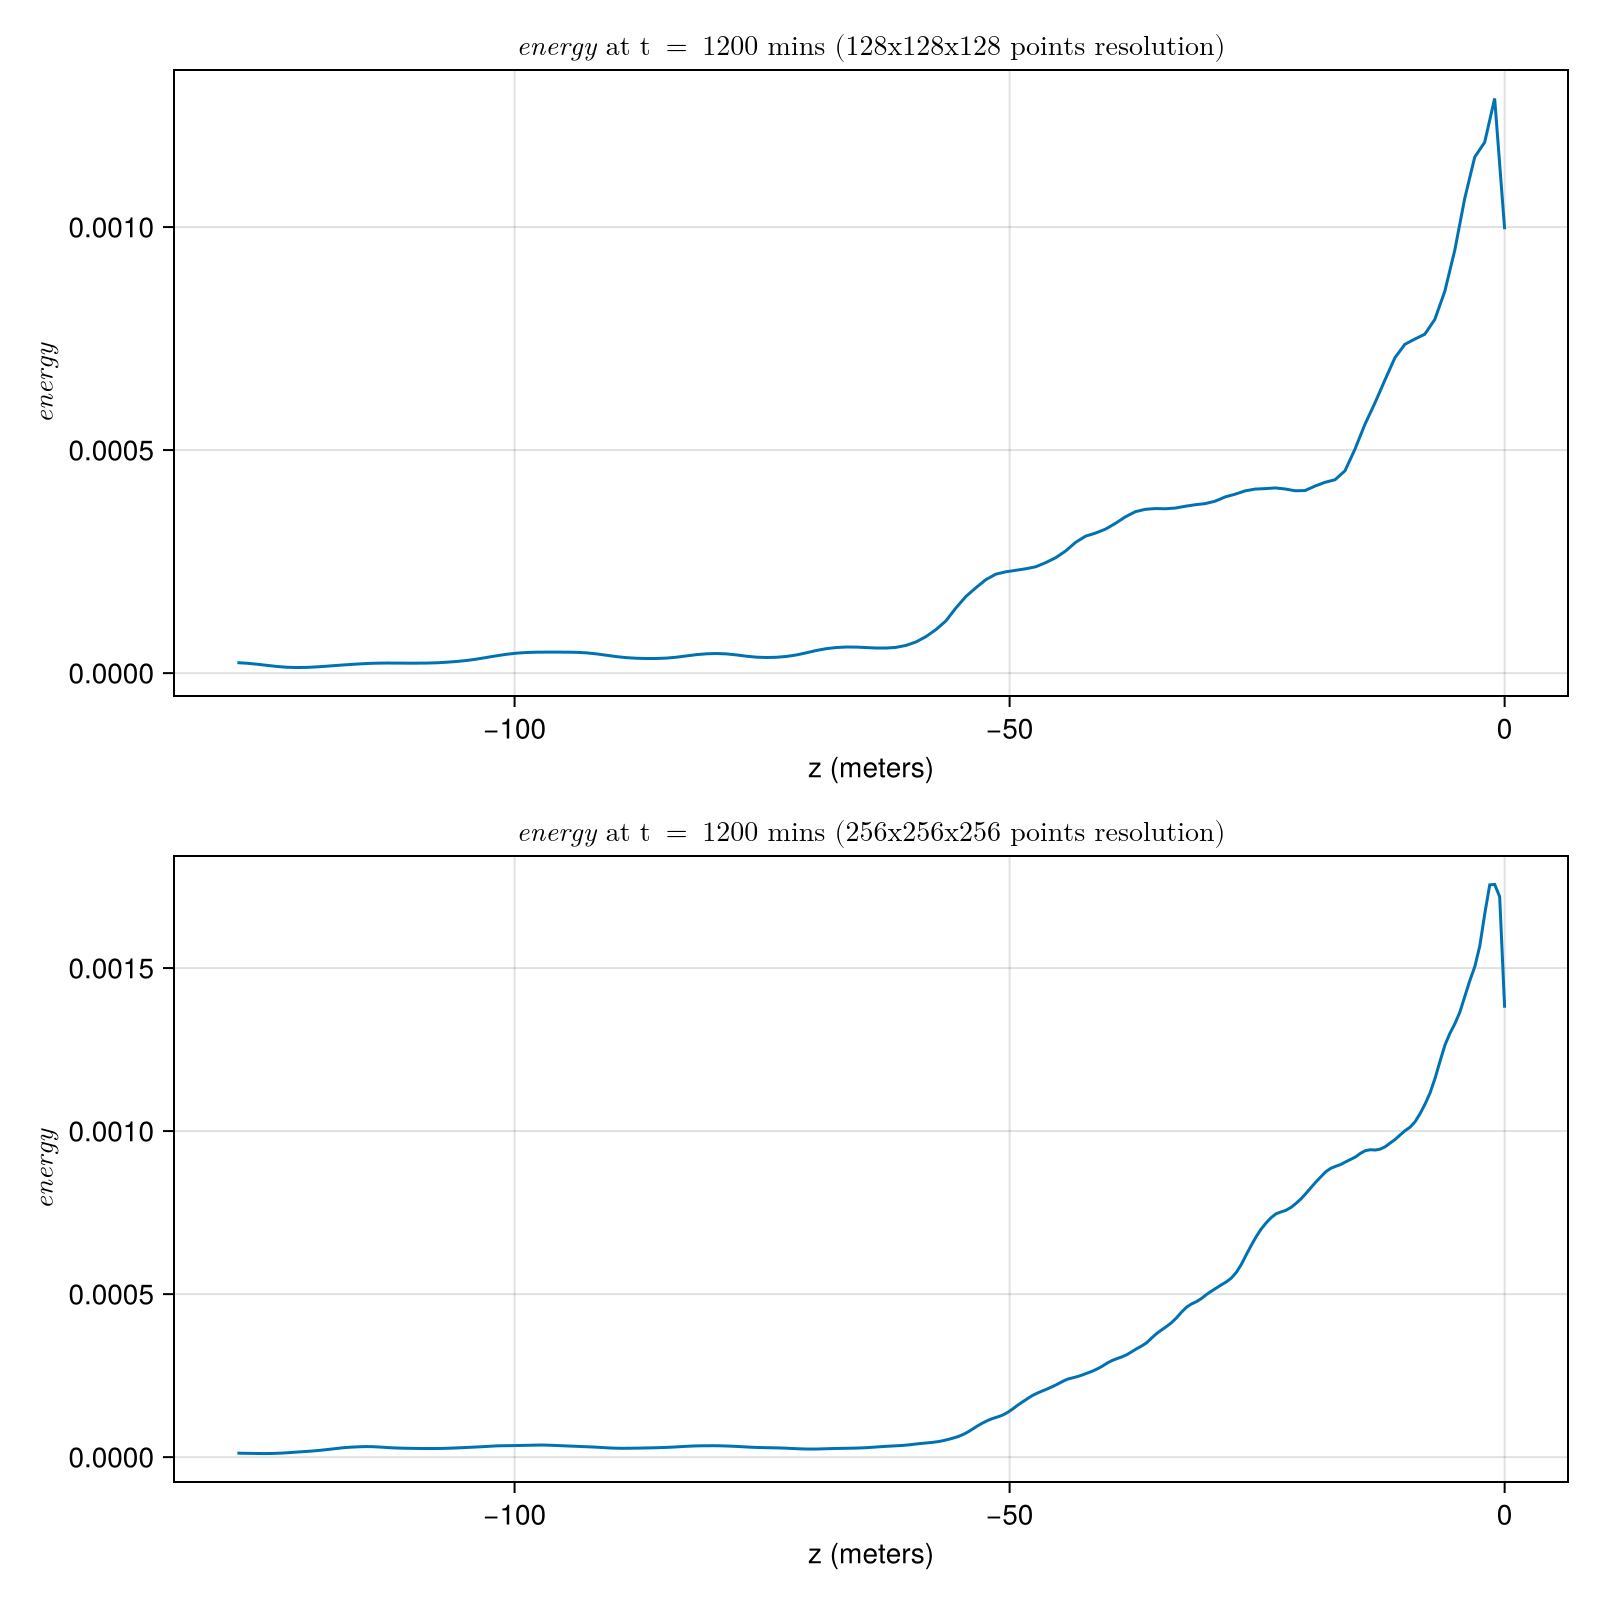

In [17]:
plot_data(energy, L"energy")

In [18]:
# General function to automatically plot the temperature cube

function plot_cube(data, density)

    fig = Figure()


    title = Label(fig[0, 1:2], "Temperature (°C) at t = 1200 mins ($(density) points resolution)")

    
    dims = (size(data.x)[1], size(data.x)[1], size(data.x)[1])

    x = LinRange(0, 127, dims[1])
    y = LinRange(0, 127, dims[2])
    z = LinRange(-127, 0, dims[3])

    vol = 19 * ones(dims...)

    vol[end, :, :] .= data.x
    vol[:, end, :] .= data.y
    vol[:, :, end] .= data.z

    ax = LScene(fig[1, 1], show_axis = true)
    
    plt = volumeslices!(ax, x, y, z, vol, colormap=:thermal)

    Colorbar(fig[1, 2], plt)

    plt[:update_yz][](dims[1])
    plt[:update_xz][](dims[2])
    plt[:update_xy][](dims[3])

    cam3d!(ax.scene, rotation_center=:eyeposition)

    return fig


end
    

plot_cube (generic function with 1 method)

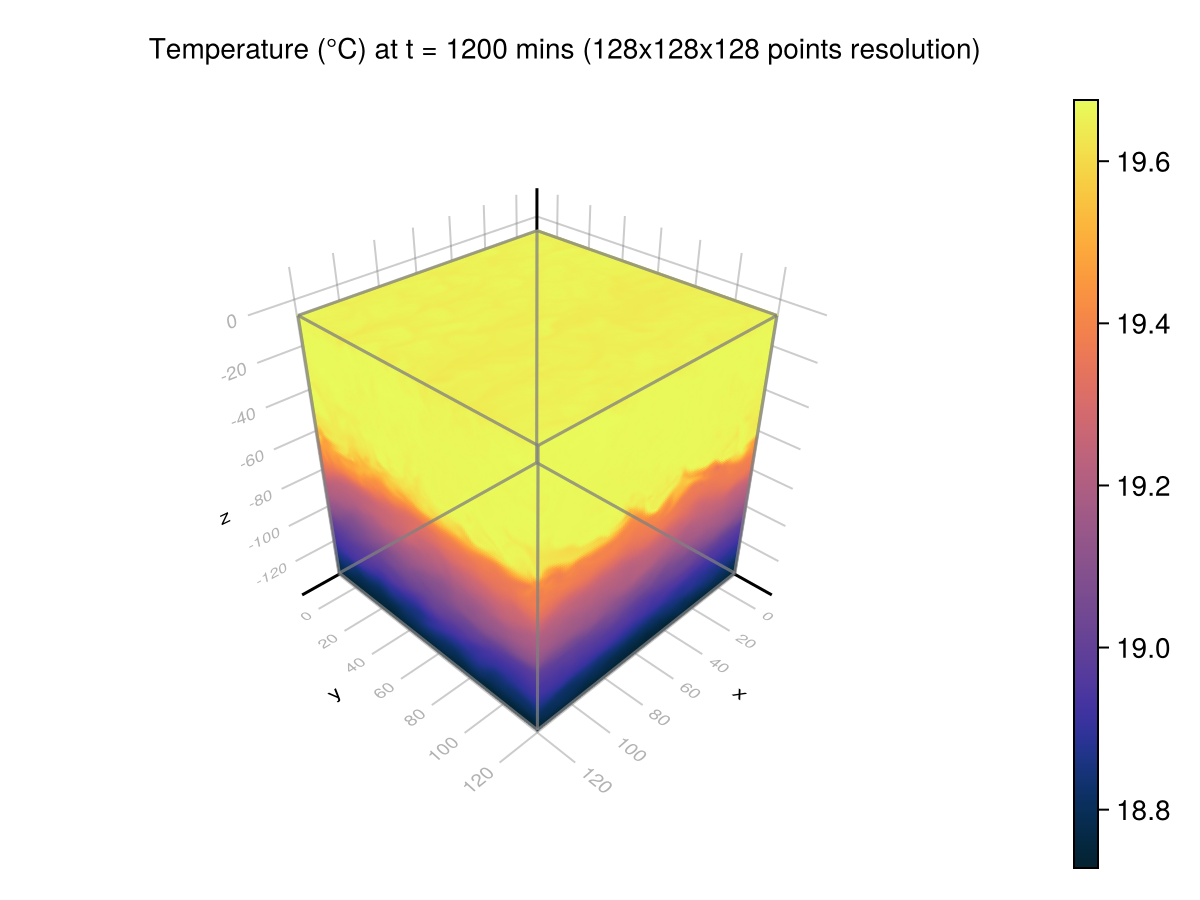

In [19]:
plot_cube(T_small, "128x128x128")

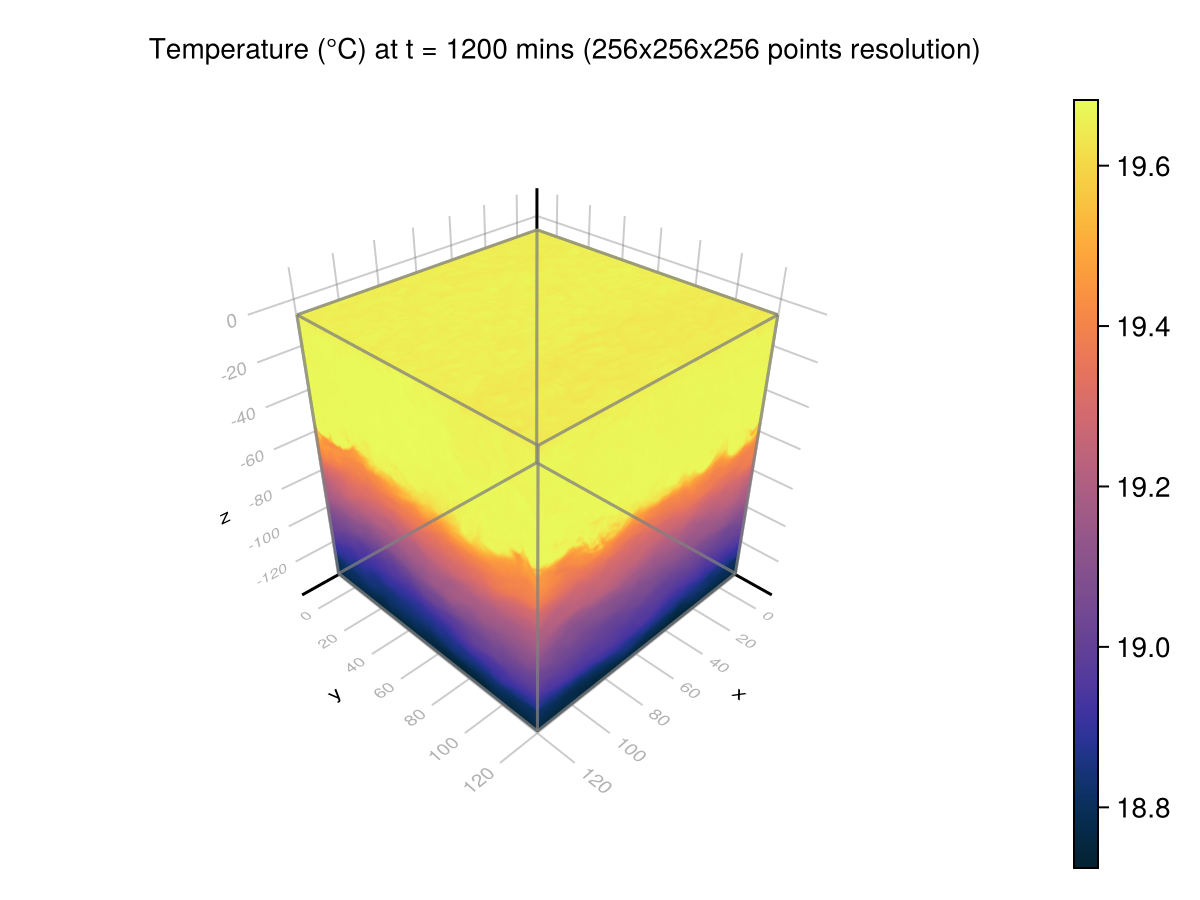

In [20]:
plot_cube(T_large, "256x256x256")